In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
data=pd.read_csv('Mall_Customers.csv')
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
features_scaled =sd.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])


C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

Text(0, 0.5, 'WCSS')

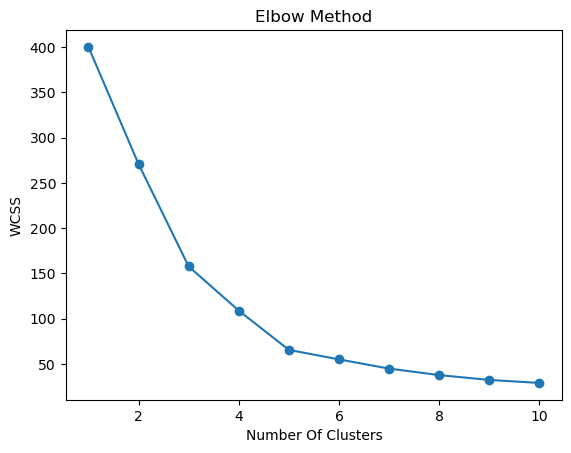

In [41]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i , init='k-means++' , random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.scatter(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number Of Clusters")
plt.ylabel("WCSS")


In [42]:
kmeans = KMeans(n_clusters=5 , init='k-means++' , random_state=42)
model = kmeans.fit_predict(features_scaled)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
data['Cluster'] = model
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1


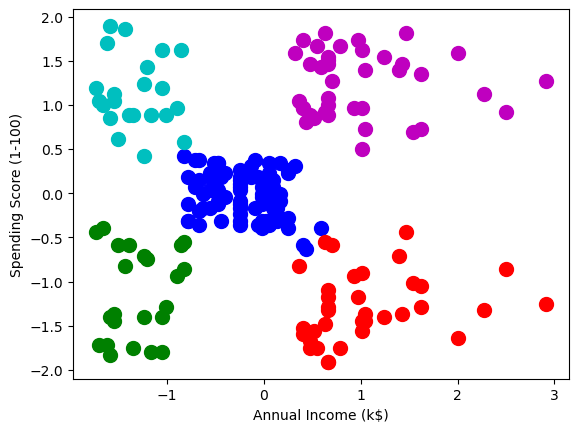

In [21]:
color = 'brgcmyk'
xlabel = 'Annual Income (k$)'
ylabel = 'Spending Score (1-100)'
plt.scatter(features_scaled[model==0,0],features_scaled[model==0,1] , s=100,c=color[0],label='cluster1')
plt.scatter(features_scaled[model==1,0],features_scaled[model==1,1] , s=100,c=color[1],label='cluster2')
plt.scatter(features_scaled[model==2,0],features_scaled[model==2,1] , s=100,c=color[2],label='cluster3')
plt.scatter(features_scaled[model==3,0],features_scaled[model==3,1] , s=100,c=color[3],label='cluster4')
plt.scatter(features_scaled[model==4,0],features_scaled[model==4,1] , s=100,c=color[4],label='cluster5')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()


In [22]:
xlabel = 'Annual Income (k$)'
ylabel = 'Spending Score (1-100)'
X = data[[xlabel,ylabel]]


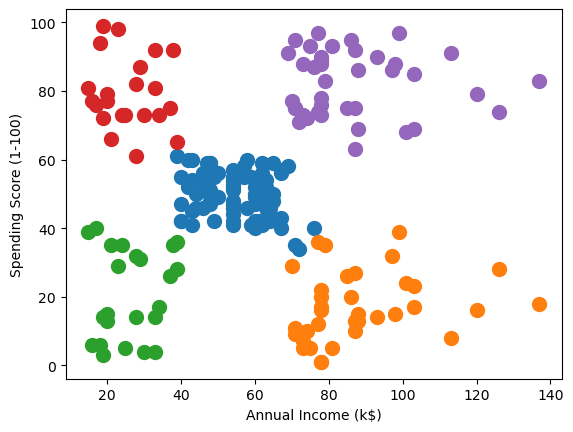

In [23]:
for label in np.unique(kmeans.labels_):
    X_ = X[label==kmeans.labels_]
    plt.scatter(X_[xlabel],X_[ylabel],s=100,label=label)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()
